# Clustering

## Problem Statement - 1
#### Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

#### Importing Librieries

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score as sil
import warnings
warnings.filterwarnings("ignore")

#### Reading the Given Data Set

In [2]:
data = pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
data.duplicated().sum()

0

In [5]:
data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
data=data.rename(columns={'ID#':'ID','Award?':'Award'})
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:
data.Award.value_counts()

0    2518
1    1481
Name: Award, dtype: int64

#### We have seen that the Id and award is no more needed to perform clustering so we are dropping both columns


### Data Processing

In [8]:
air_data = data.drop(["ID","Award"], axis=1)
air_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


In [9]:
air_data.shape

(3999, 10)

### I am using two transformation methods to check how clusters forms in two different transformation

#### Normilization

In [10]:
air_data_norm = pd.DataFrame(normalize(air_data),columns=air_data.columns)
air_data_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718
...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509


#### Standardization

In [11]:
air_data_std = pd.DataFrame(StandardScaler().fit_transform(air_data),columns=air_data.columns)
air_data_std

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975
...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088


### Hierarchical Clustering

#### Create dendrogram of Normalization data for all methots 

In [ ]:
for methods in ['single','complete','average']: 
     plt.figure(figsize =(16, 6))
     plt.title('Visualising the data, Method- {}'.format(methods)) 
     Dendrogram = sch.dendrogram(sch.linkage(air_data_norm, method = methods,optimal_ordering=False))

In [ ]:
nc=[2,3,4,5,6,7,8,9]

for i in nc:
    for linkages in ['single','average','complete']:
        hc = AgglomerativeClustering(n_clusters=i,affinity = 'euclidean', linkage = linkages)
        y = hc.fit_predict(air_data_std)
        sc=sil(air_data_std,y)
        print('Clusters = {}, linkage = {}, Sc score = {}'.format(i,linkages,sc))
    print()

#### Conclusion: Although the max score i get from clusters no 4

### Create dendrogram of Standarization data for all methots

In [ ]:
for methods in ['single','complete','average']: 
     plt.figure(figsize =(20, 6))
     plt.title('Visualising the data, Method- {}'.format(methods)) 
     Dendrogram = sch.dendrogram(sch.linkage(air_data_std, method = methods,optimal_ordering=False))

In [ ]:
nc=[2,3,4,5,6,7,8,9]

for i in nc:
    for linkages in ['single','average','complete']:
        hc = AgglomerativeClustering(n_clusters=i,affinity = 'euclidean', linkage = linkages)
        y = hc.fit_predict(air_data_std)
        sc=sil(air_data_std,y)
        print('Clusters = {}, linkage = {}, Sc score = {}'.format(i,linkages,sc))
    print()

#### Conclusion: Dataset of standarization is improving our score so we are considering Standardization dataset

### Create Clusters (y)

##### i am selecting cluster no 5

In [14]:
h_clusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='average')
h_clusters

AgglomerativeClustering(linkage='average', n_clusters=5)

In [15]:
y_hc=h_clusters.fit_predict(air_data_std)
y_hc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
air_data_hc = air_data

In [17]:
air_data_hc['HC_clusterID']=y_hc
air_data_hc

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,HC_clusterID
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [18]:
air_data_hc.groupby('HC_clusterID').agg(['count']).reset_index()

,HC_clusterID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,,count,count,count,count,count,count,count,count,count,count
0,0,3979,3979,3979,3979,3979,3979,3979,3979,3979,3979
1,1,15,15,15,15,15,15,15,15,15,15
2,2,1,1,1,1,1,1,1,1,1,1
3,3,3,3,3,3,3,3,3,3,3,3
4,4,1,1,1,1,1,1,1,1,1,1


In [19]:
air_data_hc.groupby('HC_clusterID').agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
HC_clusterID,,,,,,,,,,
0,7.288966e+04,144.193013,2.054034,1.014577,1.000754,16806.654184,11.476753,439.180699,1.319176,4117.825333
1,1.380614e+05,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667
2,1.704838e+06,0.000000,1.000000,1.000000,1.000000,17108.000000,32.000000,4823.000000,23.000000,7283.000000
3,1.226280e+05,296.000000,3.000000,1.000000,1.000000,63527.666667,63.666667,16341.000000,48.000000,2476.000000
4,1.601140e+05,500.000000,1.000000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000


### Plot Cluster

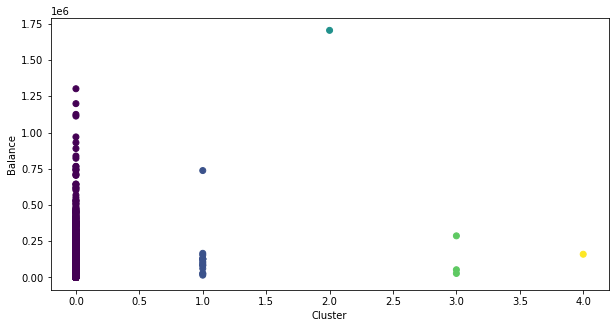

In [20]:
plt.figure(figsize=(10,5))
plt.scatter(air_data_hc['HC_clusterID'],air_data['Balance'],c=h_clusters.labels_)
plt.xlabel('Cluster')
plt.ylabel('Balance')
plt.show()

## K-Means Clustering

In [13]:
#Finding optimal number of cluster for normalize data
#using Elbow method and silhoutte method

nc=[2,3,4,5,6,7,8,9]
iner=[]
silscore =[]

for i in nc:
    Km=KMeans(i)
    Km.fit(air_data_norm)
    iner.append(Km.inertia_)

                    
for i in nc:
    hc = KMeans(n_clusters=i)
    y=hc.fit_predict(air_data_norm)
    silscore.append(sil(air_data_norm,y))

In [21]:
version.sklearn_

NameError: name 'version' is not defined

In [25]:
import sklearn
print(sklearn.__version__)

1.1.3
